In this Note we will exploring how to Applying Linear Regression and Gradient Descent to Predict Sales by TV Marketing Expenses

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [187]:
data = pd.read_csv('tvmarketing.csv')
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


<Axes: xlabel='TV', ylabel='Sales'>

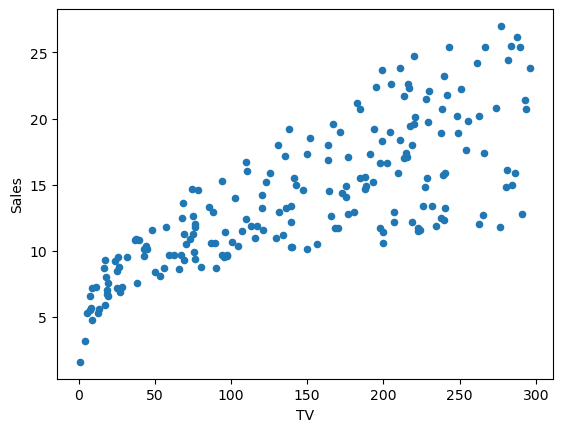

In [188]:
data.plot(x='TV', y='Sales', kind='scatter')

Our Scatter data present in: y = mx + b form
m: slope (y/x)
b: y-interceptor

In [189]:
tv = data['TV']
sales = data['Sales']

In [190]:
def LeastSquares(x, y):
    n = len(x)
    xy_sum = sum(x*y)
    x_sum = sum(x)
    y_sum = sum(y)
    x_sqrt_sum = sum(x**2)
    
    m = (n*xy_sum - x_sum*y_sum)/(n*x_sqrt_sum - x_sum**2)
    b = (y_sum-m*x_sum)/(n)
    return m, b

In [191]:
# input tv as x and sales as y
m, b = LeastSquares(tv, sales)
print(f"Linear regression. Slope: {m}. Intercept: {b}")

Linear regression. Slope: 0.04753664043301965. Intercept: 7.032593549127711


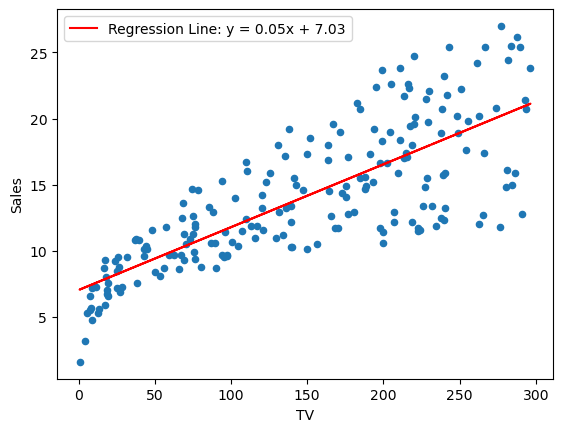

In [192]:
data.plot(x='TV', y='Sales', kind='scatter')
# we have tv as x
plt.plot(tv, m*tv+b, color='red', label=f'Regression Line: y = {m:.2f}x + {b:.2f}')
plt.legend()
plt.show()

In [193]:
def plot_linear_regression(X, Y, label_x, label_y, m, b, x_pred=np.array([]), y_pred=np.array([])):
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.plot(X, Y, 'o', color='black')
    
    plt.plot(X, m*X+b, color='red', label=f'Regression Line: y = {m:.2f}x + {b:.2f}')
    plt.plot(x_pred, y_pred, 'o', color='blue', markersize=5, label='Prediction')
    plt.legend()
    plt.show()

Make Prediction with the obtained slope and intercept

In [194]:
sale_num = len(tv) # 200

test_tv = np.array([50, 100, 150, 200, 300, 350, 400, 450])
def pred_sales(m, b, X):
    Y = m*X + b
    return Y

y_pred = pred_sales(m, b, test_tv)
print(f"Predicted sales for {sale_num} TV ads: \n{y_pred}")

Predicted sales for 200 TV ads: 
[ 9.40942557 11.78625759 14.16308961 16.53992164 21.29358568 23.6704177
 26.04724972 28.42408174]


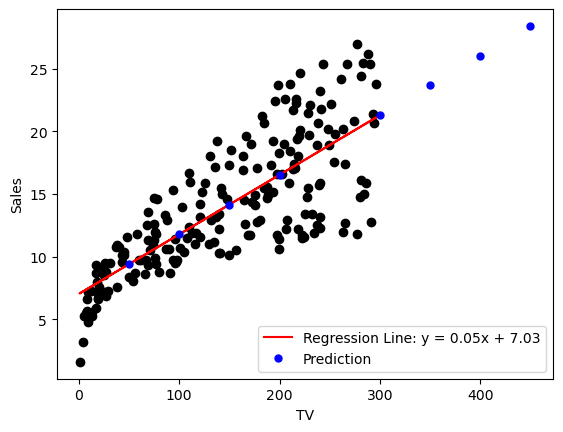

In [195]:
plot_linear_regression(tv, sales, 'TV', 'Sales', m, b, test_tv, y_pred)

# Linear Regression using Scikit-Learn 

In [196]:
from sklearn.linear_model import LinearRegression


lr_sklearn = LinearRegression()

In [197]:
print(f"Shape of X array: {tv.shape}")
print(f"Shape of Y array: {sales.shape}")

try:
    lr_sklearn.fit(tv, sales)
except ValueError as err:
    print(err)

Shape of X array: (200,)
Shape of Y array: (200,)
Expected 2D array, got 1D array instead:
array=[230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7
 266.9  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9
 227.2  66.9 199.8 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7
  53.5 261.3 239.3 102.7 131.1  69.   31.5 139.3 237.4 216.8 199.1 109.8
  26.8 129.4 213.4  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4
 213.5 193.2  76.3 110.7  88.3 109.8 134.3  28.6 217.7 250.9 107.4 163.3
 197.6 184.9 289.7 135.2 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4
  13.1 255.4 225.8 241.7 175.7 209.6  78.2  75.1 139.2  76.4 125.7  19.4
 141.3  18.8 224.  123.1 229.5  87.2   7.8  80.2 220.3  59.6   0.7 265.2
   8.4 219.8  36.9  48.3  25.6 273.7  43.  184.9  73.4 193.7 220.5 104.6
  96.2 140.3 240.1 243.2  3

In [198]:
tv = np.array(tv)
sales = np.array(sales)

In [199]:
X_sklearn = tv[:, np.newaxis]
Y_sklearn = sales[:, np.newaxis]

print(f"Shape of new X array: {X_sklearn.shape}")
print(f"Shape of new Y array: {Y_sklearn.shape}")

Shape of new X array: (200, 1)
Shape of new Y array: (200, 1)


### Fit LR Model

In [200]:
lr_sklearn.fit(X_sklearn, Y_sklearn)

LinearRegression()

In [201]:
m_sklearn = lr_sklearn.coef_
b_sklearn = lr_sklearn.intercept_

#? Yay, the result are the same as above
print(f"Linear regression using Scikit-Learn. Slope: {m_sklearn}. Intercept: {b_sklearn}")

Linear regression using Scikit-Learn. Slope: [[0.04753664]]. Intercept: [7.03259355]


In [202]:
# This is organised as a function only for grading purposes.
def pred_sklearn(X, lr_sklearn):
    ### START CODE HERE ### (~ 2 lines of code)
    X_2D = X[:, np.newaxis]
    print("X_2D:\n", X_2D)
    Y = lr_sklearn.predict(X_2D)
    ### END CODE HERE ###
    
    return Y

In [203]:
Y_pred_sklearn = pred_sklearn(test_tv, lr_sklearn)

print(f"TV marketing expenses:\n{test_tv}")
print(f"Predictions of sales using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")

X_2D:
 [[ 50]
 [100]
 [150]
 [200]
 [300]
 [350]
 [400]
 [450]]
TV marketing expenses:
[ 50 100 150 200 300 350 400 450]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 11.78625759 14.16308961 16.53992164 21.29358568 23.6704177
  26.04724972 28.42408174]]


## 3 - Linear Regression using Gradient Descent

Let's try to find linear regression coefficients m and b, by minimising the different between original value $y^{(i)}$ and the predicted value $\hat{y}^{(i)}$ with the **loss function** $L(w, b) = \frac{1}{2} (y^{(i)} - \hat{y}^{(i)})^2$ for each of the data points. Division by 2 is taken for scaling purposes for calculating partial derivatives bc it will cancel out the 2 when we take the derivative of the loss function.

To find the different between vector $y$ and vector $\hat{y}$, we can take the average of the squared different between the 2 vector divided by the average of the $n$ number of data points.
$$E\left(m, b\right) = \frac{1}{2n}\sum_{i=1}^{n} \left(\hat{y}^{(i)} - y^{(i)}\right)^2 =

\frac{1}{2n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)^2,\tag{1}$$

To apply Gradient Descent, we find the partial derivative of E(m ,b) in respect of m and b (2 was cancel out after derivative)
$$
\begin{align}

\frac{\partial E }{ \partial m } &=

\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)x^{(i)},\\

\frac{\partial E }{ \partial b } &=

\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right),

\tag{2}\end{align}
$$

and then update the m and b with the following formula:
$$\begin{align}

m &= m - \alpha \frac{\partial E }{ \partial m },\\

b &= b - \alpha \frac{\partial E }{ \partial b },

\tag{3}\end{align}$$

Before we starting out, we need to normalize the data to make the gradient descent converge faster by substract all the data point by its means and divide by its standard deviation.
+ Why convert faster? Because the range of the data is small and the gradient descent will be able to find the minimum value faster.

In [204]:
X = tv
Y = sales
X_norm = (X - np.mean(X))/np.std(X)
Y_norm = (Y - np.mean(Y))/np.std(Y)

In [215]:
print("X_norm:",X_norm)

X_norm: [ 0.96985227 -1.19737623 -1.51615499  0.05204968  0.3941822  -1.61540845
 -1.04557682 -0.31343659 -1.61657614  0.61604287 -0.94515567  0.79002835
 -1.4390876  -0.57850171  0.66625345  0.56466461 -0.92530498  1.56887609
 -0.90895735  0.0030068   0.8332328   1.05509347 -1.5628625   0.94883389
 -0.98952781  1.35285385 -0.04837147  1.08662104  1.18820988 -0.89260972
  1.70316018 -0.3986778  -0.58200477  1.38438142 -0.59952009  1.67747105
  1.39956136 -0.84473452 -1.21372386  0.94533082  0.64757044  0.34981006
  1.711334    0.6989487  -1.42390765  0.327624   -0.66958136  1.08428567
  0.93598932 -0.93581417  0.61604287 -0.54463877  0.80987904  0.41520058
  1.35051848  0.60553368 -1.63175608 -0.12660655  0.74448853  0.74332084
 -1.09228433  1.33417085  1.07727954 -0.51778195 -0.18615862 -0.91129272
 -1.34917564 -0.09040823  1.05509347  0.81454979  0.60786906 -0.43487612
 -1.40405696 -0.20600931  0.77484841 -1.51965805 -1.39588315 -0.30993353
 -1.65394214 -0.36247947 -0.82488383  1.083

In [216]:
print("Y_norm:",Y_norm)

Y_norm: [ 1.55205313 -0.69604611 -0.90740587  0.86033029 -0.21568303 -1.31091086
 -0.42704278 -0.15803946 -1.77205942 -0.65761706 -1.04190753  0.64897053
 -0.92662039 -0.83054778  0.9564029   1.6096967  -0.29254112  1.99398717
 -0.5231154   0.11096387  0.76425767 -0.29254112 -1.61834324  0.28389458
 -0.83054778 -0.38861374  0.18782197  0.36075268  0.93718838 -0.67683159
  1.41755147 -0.40782826 -0.8497623   0.64897053 -0.86897682 -0.23489755
  2.1861324   0.1301784  -0.75368968  1.43676599  0.49525434  0.59132696
  1.2830498  -0.21568303 -1.06112206  0.16860744 -0.65761706  1.76341289
  0.14939292 -0.83054778 -0.50390088 -0.63840254  1.64812575  1.37912242
  1.18697718  1.8594855  -1.63755776 -0.15803946  1.87870003  0.84111576
 -1.13798015  1.95555812  0.32232363 -0.00432327  0.76425767 -0.90740587
 -0.86897682 -0.11961041  0.93718838  1.59048218  0.82190124 -0.31175564
 -1.00347849 -0.58075897  0.57211244 -1.02269301 -1.36855443  0.03410578
 -1.67598681 -0.58075897 -0.42704278 -0.330

### Define Cost Function

In [206]:
#? cost function
def E(m, b, X, Y):
    return 1/(2*len(Y)) * np.sum((m*X + b - Y)**2)

### Define Partial Derivative of Cost Function

In [207]:
#? Partial Derivative of Cost Function
def dEdm(m, b, X, Y):
    n = len(Y)
    #? 2 options, same result
    # re = 1/n * sum((m*X +b - Y) * X)
    re = 1/n * np.dot(m*X +b - Y, X) 

    return re

def dEdb(m, b, X, Y):
    n = len(Y)
    re = 1/n * np.dot(m*X + b - Y, Y**0)
    return re

In [208]:
print("Partial Derivative of Cost Function with respect to m: ", dEdm(m, b, X, Y))
print("Partial Derivative of Cost Function with respect to b: ", dEdb(m, b, X, Y))

Partial Derivative of Cost Function with respect to m:  -2.1600499167107047e-13
Partial Derivative of Cost Function with respect to b:  3.0553337637684308e-15


In [209]:
print(dEdm(0, 0, X_norm, Y_norm))
print(dEdb(0, 0, X_norm, Y_norm))
print(dEdm(1, 5, X_norm, Y_norm))
print(dEdb(1, 5, X_norm, Y_norm))

-0.7822244248616065
1.509903313490213e-16
0.21777557513839416
5.000000000000001


### Implement Gradient Descent to find m and b with Partial Derivative of Cost Function
$$
\begin{align}
m &= m - \alpha \frac{\partial E }{ \partial m },\\
b &= b - \alpha \frac{\partial E }{ \partial b },
\end{align}
$$

In [212]:
def gradient_descent(X, Y, m, b, learning_rate=0.002, iteration=30, print_cost=False):
    '''
        X: dataset use to predict
        Y: predicted dataset 
        m: slope 
        b: y-intercept
        
    '''
    for i in range(iteration):
        m_new = m - learning_rate*dEdm(m ,b, X, Y)
        b_new = b - learning_rate*dEdb(m ,b, X, Y)
            
        m = m_new
        b = b_new
        
        if print_cost is True:
            print(f"Cost Function after {i} iteration:", E(m, b, X, Y))
    
    return m ,b

### Choose a initial point for m and b

In [217]:
m_initial = 0; b_initial = 0; iteration = 30; learning_rate = 1.2
m_gd, b_gd = gradient_descent(X_norm, Y_norm, m_initial, b_initial, learning_rate, iteration, print_cost=True)

Cost Function after 0 iteration: 0.2062999755919659
Cost Function after 1 iteration: 0.19455197461564455
Cost Function after 2 iteration: 0.19408205457659172
Cost Function after 3 iteration: 0.19406325777502959
Cost Function after 4 iteration: 0.1940625059029671
Cost Function after 5 iteration: 0.1940624758280846
Cost Function after 6 iteration: 0.1940624746250893
Cost Function after 7 iteration: 0.19406247457696948
Cost Function after 8 iteration: 0.19406247457504472
Cost Function after 9 iteration: 0.19406247457496772
Cost Function after 10 iteration: 0.19406247457496462
Cost Function after 11 iteration: 0.19406247457496453
Cost Function after 12 iteration: 0.19406247457496453
Cost Function after 13 iteration: 0.19406247457496448
Cost Function after 14 iteration: 0.19406247457496448
Cost Function after 15 iteration: 0.19406247457496448
Cost Function after 16 iteration: 0.19406247457496448
Cost Function after 17 iteration: 0.19406247457496448
Cost Function after 18 iteration: 0.194062

### Let verify the result of the Gradient Descent with the Scikit-Learn Linear Regression Model

In [219]:
X_pred = test_tv
# Use the same mean and standard deviation of the original training array X
X_pred_norm = (X_pred - np.mean(X))/np.std(X)
Y_pred_gd_norm = m_gd * X_pred_norm + b_gd
# Use the same mean and standard deviation of the original training array Y
Y_pred_gd = Y_pred_gd_norm * np.std(Y) + np.mean(Y)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")
print(f"Predictions of sales using Gradient Descent:\n{Y_pred_gd}")

TV marketing expenses:
[ 50 100 150 200 300 350 400 450]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 11.78625759 14.16308961 16.53992164 21.29358568 23.6704177
  26.04724972 28.42408174]]
Predictions of sales using Gradient Descent:
[ 9.40942557 11.78625759 14.16308961 16.53992164 21.29358568 23.6704177
 26.04724972 28.42408174]
